# Analysis of the new datasets

In [1]:
import xarray as xr
import xarray.ufuncs as xrf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from matplotlib import colors

from definitions import *  # imports all functions from definitions.py
#from bootstrap_sampling import *

xr.set_options(
    keep_attrs=True, display_style="html"
)  # Attributes of DataArrays will be kept through operations.
plt.rcParams["font.size"] = "22"


alt = [
    70,
    72,
    74,
    76,
    78,
    80,
    82,
    84,
    86,
    88,
    90,
    92,
    94,
    96,
    98,
    100,
    102,
    104,
    106,
    108,
    110,
    112,
    114,
    116,
    118,
    120,
]
root_path = "/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/"
#dir_path = "/home/hochatmstud/bene/"

In [2]:
station = "Leipzig"

## Wind measurements

In [3]:
ds_wind = read_group("wind", station, root_path)

u = read_var(ds_wind, "u0")
v = read_var(ds_wind, "v0")

if station == "Sodankyla_Kiruna":
    u = u.sel(time=slice("2008", "2020"))
    v = v.sel(time=slice("2008", "2020"))

u_anomalie = anomalie("dayofyear", u)

v_anomalie = anomalie("dayofyear", v)

sea_u = sea(40, station, u)
sea_u_anomalie = sea(40, station, u_anomalie)

sea_v = sea(40, station, v)
sea_v_anomalie = sea(40, station, v_anomalie)

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


### Zonal wind component

#### Climatology

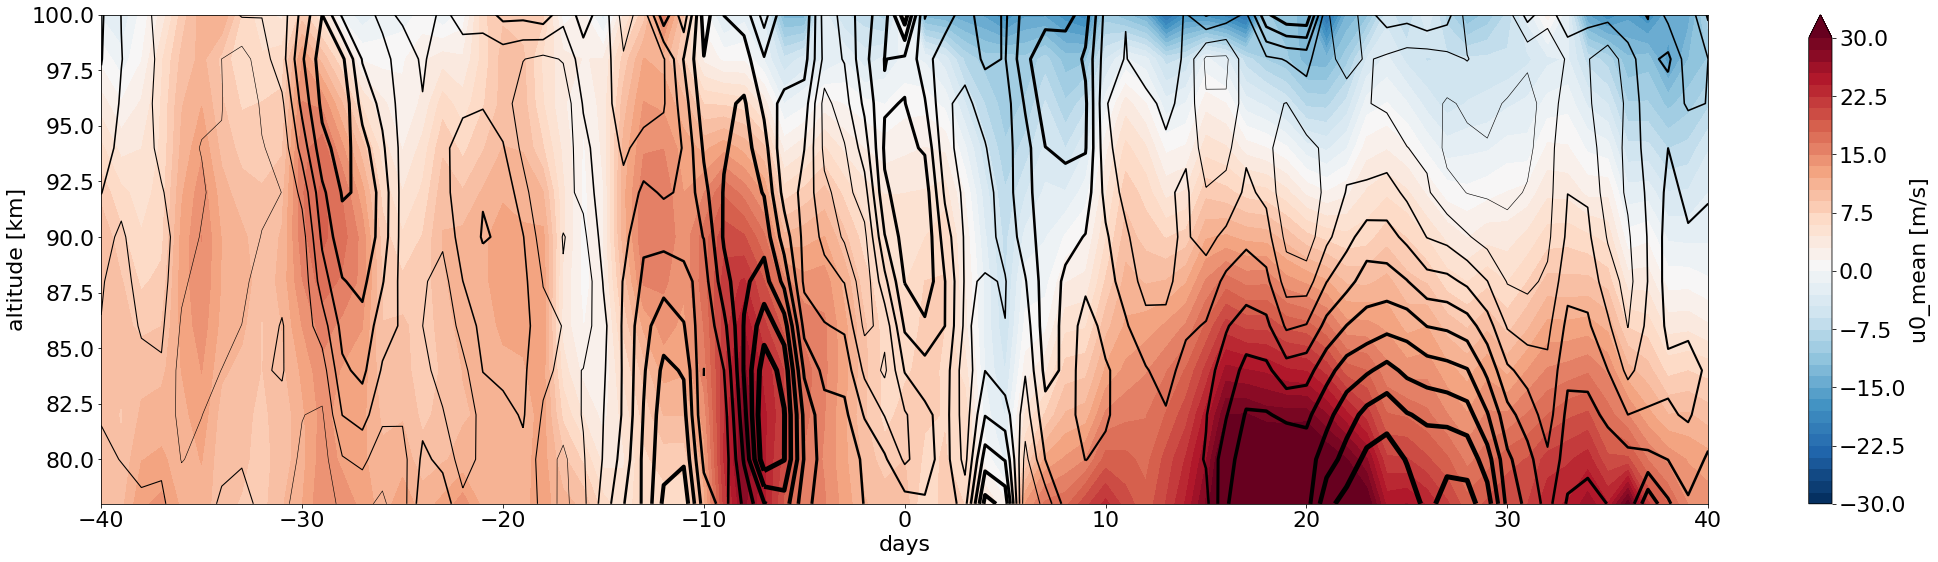

In [4]:
plotting_routine(sea_u, "u0")

#### Anomalies

In [5]:
plotting_routine(sea_u_anomalie, "u0")
# stat_signific(station,sea_u_anomalie,u_anomalie)

     10000 samples generated


/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


ValueError: indexes along dimension 'alt' are not equal

### Meridional wind component

#### Climatology

In [ ]:
plotting_routine(sea_v, "v0")

#### Anomalies

In [ ]:
plotting_routine(sea_v_anomalie, "v0")

## Wave estimates

In [ ]:
ds_waves = read_group("waves", station, root_path)
gw = read_var(ds_waves, "GW")
pw = read_var(ds_waves, "PW")

if station == "Sodankyla_Kiruna":
    gw = gw.sel(time=slice("2008", "2020"))
    pw = pw.sel(time=slice("2008", "2020"))

gw_anomalie = anomalie("dayofyear", gw)

pw_anomalie = anomalie("dayofyear", pw)

sea_gw = sea(40, station, gw)
# sea_gw.name = 'sea_gw'
sea_gw_anomalie = sea(40, station, gw_anomalie)
sea_gw_anomalie["name"] = "sea_gw_anomalie"

sea_pw = sea(40, station, pw)
# sea_pw.name = 'sea_pw'
sea_pw_anomalie = sea(40, station, pw_anomalie)
sea_pw_anomalie["name"] = "sea_pw_anomalie"

### Gravity waves

#### Gravity wave activity

##### Climatology

In [ ]:
plotting_routine(sea_gw, "GW", True)

##### Anomalies

In [ ]:
plotting_routine(sea_gw_anomalie, "GW")

#### Gravity wave drag

In [ ]:
station_name = station

directory = glob.glob(f"{root_path}GWD*_{station}.nc")[0]

ds = xr.open_dataset(directory)

gwd = ds["GWD"]

if station == "Sodankyla_Kiruna":
    gwd = gwd.sel(time=slice("2008", "2021"))

gwd_anomalie = anomalie("dayofyear", gwd)

sea_gwd = sea(40, station_name, gwd)
# sea_gwd.name = 'sea_gwd'
sea_gwd_anomalie = sea(40, station_name, gwd_anomalie)

##### Climatology

In [ ]:
plotting_routine(sea_gwd, "GWD")

##### Anomalies

In [ ]:
plotting_routine(sea_gwd_anomalie, "GWD")

### Planetary waves

#### Climatology

In [ ]:
plotting_routine(sea_pw, "PW", True)

#### Anomalies

In [ ]:
plotting_routine(sea_pw_anomalie, "PW")